# 02、多层感知机模型
这一节主要使用pytorch从零开始搭建一个多层感知机模型，笔者默认渎者有一定的深度学习基础知识，比如基础的线性回归，本节不对公式以及概念过多涉及，需要用到的知识点会提及一下。
>感知机(preceptron)是线性分类的二分类模型，输入为实例的特征向量，输出为实例的类别，分别用 1 和 -1 表示。感知机将输入空间(特征空间)中的实例划分为正负两类分离的超平面，旨在求出将训练集进行线性划分的超平面，为此，导入基于误分类的损失函数，利用梯度下降法对损失函数进行极小化，求得最优解。感知机是神经网络和支持向量机的基础。
参考：https://www.jianshu.com/p/c91087e6e1ea

## Pytorch训练一般步骤
跟其他框架类似，pytorch的训练步骤从准备数据开始然后进行模型构建然后损失函数定义最后进行优化。
### 1.数据准备
一般来说，拿到数据后将数据分为两部分一部分是训练集一部分是测试集，还有人会再分一份验证集以验证不同的算法，本节主要使用的训练集和测试集进行说明，我们那波士顿房价数据集为例。波士顿数据集中有大量的房价售价信息，每一处房产的售价显然是不尽相同的，在北京三环和在十八线的小城市的房价显然是不同的，所以每一处房产有13个特征值，这些特征值一同决定了房子的售价，其特征为：
- CRIM：城镇人均犯罪率。

- ZN：住宅用地超过 25000 sq.ft. 的比例。

- INDUS：城镇非零售商用土地的比例。

- CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）。

- NOX：一氧化氮浓度。

- RM：住宅平均房间数。

- AGE：1940 年之前建成的自用房屋比例。

- DIS：到波士顿五个中心区域的加权距离。

- RAD：辐射性公路的接近指数。

- TAX：每 10000 美元的全值财产税率。

- PTRATIO：城镇师生比例。

- B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。

- LSTAT：人口中地位低下者的比例。

MEDV：自住房的平均房价，以千美元计。

我准备了一份波士顿房价信息的csv文件在本目录的data/house/下供读者使用。

In [31]:
# 导入使用的库
import numpy as np
import pandas as pd
import torch
from torch import nn
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

In [38]:
# 1.准备数据
data = pd.read_csv('./data/house/housing.csv')
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [19]:
# 划分训练集测试集
np_data = data.values
split_number = 400
train_data = np_data[0: 400, 0:13]
train_labels = np_data[0: split_number, 13:]

test_data = np_data[split_number:,0:13]
test_labels = np_data[split_number:, 13:]


print(f"训练集样本形状：{train_data.shape},训练集标签形状：{train_labels.shape}.")
print(f"测试集样本形状：{test_data.shape}, 测试集标签形状：{test_labels.shape}.")

训练集样本形状：(400, 13),训练集标签形状：(400, 1).
测试集样本形状：(106, 13), 测试集标签形状：(106, 1).


### 2.定义模型
如图所示，感知机有多个输入对应多个特征值，然后与权重相乘，通过激活函数进行输出，一般来说单层感知机可以处理线性回归问题，但是单层的神经元泛化能力，对数据的表征能力较弱。

![单层感知机](./image/单层感知机.png)

随着BP算法的提出，以及解决XOR问题，多层的感知机成为发展的新方向，BP算法具体方法不再赘述简而言之就是梯度反向传播，下图为多层感知机的一般表示。
![单层感知机](./image/MLP.png)

这一节我们使用MLP模型完成回归任务。

In [40]:
# 2.定义模型
net = nn.Sequential(
    nn.Linear(13, 14),
    nn.Linear(14, 1)

)

#### API 说明：
torch.nn API存储着大量关于神经网络的操作和构成部分，上面提到的nn.Linear,官方介绍

torch.nn.Linear(in_features, out_features, bias=True)，

- in_features – size of each input sample（输入特征的形状）
- out_features – size of each output sample（输出特征的形状）
- bias – If set to False, the layer will not learn an additive bias. Default: True（设置权重）

在使用的时候，我们可以认为输入形状就是l层的神经元个数，输出形状就是后面的神经元个数，比如我们建立的模型第一层是输入层，输入形状为13个特征所以第一个参数为13，后面那一层的神经元我想设置14个神经元，所以我在规定输出形状是我就要设置为14，以此类推在下一个Linear层输入形状就是上一层输出形状一定要一一对应，否则会出问题。

### 3.损失函数，优化器设置、训练
此处需要定义损失函数，一般来说我们选取一个非负数作为误差，数值越小，误差越小，对于回归问题我们使用MSE平方差损失函数。

简写为loss = 1/2 (W*X - y_label) ^ 2 

W为权重向量，X为输入值向量，我们假设W，X向量是列向量，那我们需要把W向量进行转置变成行向量，然后进行矩阵乘法获得相应的数值。
添加1/2的作用是在求导的时候方便计算。我们使用API，nn.MSELoss初始化一个实例cost。然后下面会使用它进行计算loss，定义玩loss后需要定义优化器，优化器也成优化算法是对常见优化算法SGD,Adam等的封装，使用API，torch.optim.Adam(),需要传入网络的参数net.parameters()同时传入学习率lr，学习率的概念不再赘述后期如果更新的话会进行更新。

笔者使用常用的Adam优化器进行优化，SGD也可以但是优化速度太慢。

In [42]:
# 3 定义优化器和损失函数
cost = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# 4 训练网络
max_epoch = 100
iter_loss = []
batch_loss = []
for i in range(max_epoch):
    # 重点，权重记得清零
    optimizer.zero_grad()
    for n in range(train_data.shape[0]):
        input = torch.FloatTensor(train_data[n, :])
        output = torch.FloatTensor(train_labels[n, :])
        predict = net(input)
        loss = cost(predict, output)
        batch_loss.append(loss.data.numpy())
        loss.backward()

    optimizer.step()
    iter_loss.append(np.average(np.array(batch_loss)))
    if i % 20==0:
        print(f"Epochs:{i},Loss:{np.array(iter_loss).mean()}")

Epochs:0,Loss:47.013553619384766
Epochs:20,Loss:132.3824920654297
Epochs:40,Loss:114.02400970458984
Epochs:60,Loss:101.41638946533203
Epochs:80,Loss:92.71234893798828


### 说明：
为什么手动梯度清零？

> 由是因为PyTorch默认会对梯度进行累加。至于为什么PyTorch有这样的特点，在网上找到的解释是说由于PyTorch的动态图和autograd机制使得其非常灵活，这也意味着你可以得到对一个张量的梯度，然后再次用该梯度进行计算，然后又可重新计算对新操作的梯度，对于何时停止前向操作并没有一个确定的点。所以自动设置梯度为0比较棘手，因为你不知道什么时候一个计算会结束以及什么时候又会有一个新的开始。默认累加的好处是当在多任务中对前面共享部分的tensor进行了多次计算操作后，调用不同任务loss的backward，那些tensor的梯度会自动累加，缺点是当你不想先前的梯度影响到当前梯度的计算时需要手动清零

训练过程为：
1. 获取loss：输入图像和标签，通过infer计算得到预测值，计算损失函数；
2. optimizer.zero_grad() 清空过往梯度；
3. loss.backward() 反向传播，计算当前梯度；
4. optimizer.step() 根据梯度更新网络参数

参考：
https://blog.csdn.net/yangwangnndd/article/details/94667922
https://www.zhihu.com/question/303070254/answer/573037166

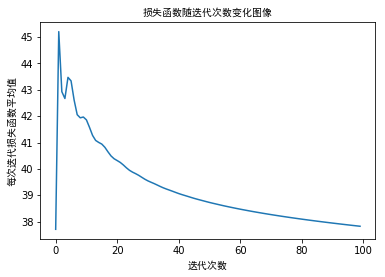

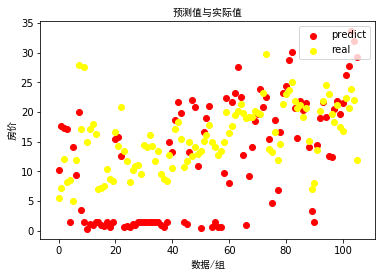

odict_keys(['0.weight', '0.bias', '2.weight', '2.bias'])


In [37]:
#5 测试网络效果
# 画图代码参考：https://blog.csdn.net/dear_jing/article/details/104929957
predict_ass = []
for i in range(test_data.shape[0]):
    input_ = torch.FloatTensor(test_data[i, :])
    predict_ass.append(net(input_))

# 图1
x = np.arange(max_epoch)
y = np.array(iter_loss)
myfont = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')
plt.plot(x, y)
plt.title('损失函数随迭代次数变化图像', fontproperties=myfont)
plt.xlabel('迭代次数', fontproperties=myfont)
plt.ylabel('每次迭代损失函数平均值', fontproperties=myfont)
plt.show()

#图2
x = np.arange(test_data.shape[0])
y1 = np.array(predict_ass)
y2 = np.array(test_labels)

myfont = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')
line1 = plt.scatter(x, y1, c='red')
line2 = plt.scatter(x, y2, c='yellow')
plt.legend([line1, line2], ["predict", "real"], loc=1)
plt.title('预测值与实际值', fontproperties=myfont)
plt.xlabel('数据/组', fontproperties=myfont)
plt.ylabel('房价', fontproperties=myfont)
plt.show()

#ps 查看权重
print(net.state_dict().keys())